# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [132]:
import pandas as pd

In [133]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

In [134]:
import requests
from io import StringIO

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv"

# Obtener el contenido del archivo CSV
response = requests.get(url).text

# Crear un objeto StringIO a partir del contenido obtenido
csv_data = StringIO(response)

# Leer el archivo CSV en un DataFrame de pandas
dataset = pd.read_csv(csv_data, delimiter=',', comment="#")
print(dataset)


      TARGET   LOAN   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  \
0          0   4700   88026.0  115506.0   6.0    0.0     0.0  182.248332   
1          0  19300   39926.0  101208.0   4.0    0.0     0.0  140.051638   
2          0   5700   71556.0   79538.0   2.0    0.0     0.0   92.643085   
3          0  13000   44875.0   57713.0   0.0    1.0     0.0  184.990324   
4          0  19300   72752.0  106084.0  11.0    0.0     0.0  193.707100   
...      ...    ...       ...       ...   ...    ...     ...         ...   
1849       1  53400  228236.0  305514.0   6.0    0.0     0.0   11.148069   
1850       1  53600  235895.0  299772.0   5.0    0.0     0.0  112.748282   
1851       1  53600  208197.0  297280.0   4.0    1.0     1.0  160.485251   
1852       1  65500  205156.0  290239.0   2.0    0.0     0.0   98.808206   
1853       1  77400   87651.0  224630.0   9.0    0.0     2.0   73.469630   

      NINQ  CLNO     DEBTINC  
0      0.0  27.0   29.209023  
1      0.0  14.0   31.545

In [135]:
dataset.columns

Index(['TARGET', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [136]:
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [139]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

El conjunto de datos se refiere a información relacionada con préstamos y clientes. Proporciona detalles sobre diferentes variables que se utilizan para predecir si un cliente incumplirá o pagará un préstamo.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo que debe predecirse se denomina "TARGET". Es una variable categórica binaria que tiene dos valores posibles: 1 y 0. Un valor de 1 indica que el cliente ha incumplido en el préstamo, mientras que un valor de 0 indica que el cliente ha pagado el préstamo.

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Hay varios atributos disponibles en el conjunto de datos que se pueden utilizar para realizar la predicción. Estos atributos son los siguientes:

LOAN: Monto del préstamo solicitado.

MORTDUE: Monto adeudado en la hipoteca existente.

VALUE: Valor actual de la propiedad.

YOJ: Número de años en el trabajo actual.

DEROG: Número de informes derogatorios importantes.

DELINQ: Número de líneas de crédito en mora.

CLAGE: Edad de la línea de comercio más antigua en meses.

NINQ: Número de líneas de crédito recientes.

CLNO: Número de líneas de crédito totales.

DEBTINC: Relación deuda-ingresos.


4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

La importancia relativa de cada atributo para la predicción puede variar dependiendo del conjunto de datos y el problema específico. Sin embargo, en general, es posible que atributos como el monto del préstamo (LOAN), el monto adeudado en la hipoteca existente (MORTDUE), el valor de la propiedad (VALUE) y la relación deuda-ingresos (DEBTINC) sean considerados importantes para predecir el incumplimiento del préstamo. Estos atributos están directamente relacionados con la capacidad financiera y la situación crediticia del cliente. Sin embargo, es necesario realizar un análisis más detallado y explorar las relaciones entre los atributos para determinar qué atributos son los más determinantes en este conjunto de datos específico.


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [140]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Dividir el dataset en características (X) y variable objetivo (y)
X = dataset.drop('TARGET', axis=1)
y = dataset['TARGET']

# Dividir los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del clasificador SGDClassifier con los valores por defecto
classifier = SGDClassifier(random_state=42)

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento y evaluación
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

# Imprimir los resultados
print("Conjunto de entrenamiento:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1:", f1_score(y_train, y_train_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_train, y_train_pred))

print("\nConjunto de evaluación:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("Matriz de confusión:")
print(confusion)

Conjunto de entrenamiento:
Accuracy: 0.8361429534726905
Precision: 0.0
Recall: 0.0
F1: 0.0
Matriz de confusión:
[[1240    0]
 [ 243    0]]

Conjunto de evaluación:
Accuracy: 0.8221024258760108
Precision: 0.0
Recall: 0.0
F1: 0.0
Matriz de confusión:
[[305   0]
 [ 66   0]]


C:\Users\Martin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



El recall se refiere a la capacidad del modelo para identificar correctamente a aquellos clientes que incumplirán en el préstamo (clase positiva). Un valor de recall bajo indica que el modelo está fallando en identificar correctamente los casos positivos. En otras palabras, el recall representa la proporción de clientes que realmente incumplieron en el préstamo que el modelo logra detectar correctamente.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Definir los hiperparámetros a probar
parameters = {
    'loss': ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'alpha': [0.001, 0.01, 0.1, 1.0,10]
}

# Crear el clasificador SGD
sgd = SGDClassifier(random_state=42)

# Realizar grid search con validación cruzada
grid_search = GridSearchCV(estimator=sgd, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los resultados
results = grid_search.cv_results_
best_estimator = grid_search.best_estimator_

# Imprimir los resultados
print("Resultados de Grid Search:")
for mean_score, std_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print("Accuracy promedio:",round(mean_score,2) , " Varianza:", round(std_score,2))
    print("Configuración:", params)
    print("----------------------------------------------")

# Evaluar sobre el conjunto de entrenamiento y evaluación con la mejor configuración encontrada
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

best_params = grid_search.best_params_
print("Parámetros del mejor modelo:", best_params)

print("Métricas en el conjunto de entrenamiento:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-score:", f1_score(y_train, y_train_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_train, y_train_pred))
print("----------------------------------------------")

print("Métricas en el conjunto de evaluación:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-score:", f1_score(y_test, y_test_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))

Resultados de Grid Search:
Accuracy promedio: nan  Varianza: nan
Configuración: {'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'hinge'}
----------------------------------------------
Accuracy promedio: nan  Varianza: nan
Configuración: {'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'log_loss'}
----------------------------------------------
Accuracy promedio: nan  Varianza: nan
Configuración: {'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'log'}
----------------------------------------------
Accuracy promedio: nan  Varianza: nan
Configuración: {'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'modified_huber'}
----------------------------------------------
Accuracy promedio: nan  Varianza: nan
Configuración: {'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'squared_hinge'}
----------------------------------------------
Accuracy promedio: nan  Varianza: nan
Configuración: {'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'perceptron'}
-------------------

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


325 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Martin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Martin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\Martin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "C:\Users\Mart

Incluso la mejor configuración al poner a prueba muchos parámetros diferentes, y con 5-fold cross-validation, obtuvimos los mismos resultados en término de precisión y recall que con el SGDClassifier que viene por defecto.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fijar la semilla aleatoria para hacer el experimento repetible
random_seed = 42

# Crear el clasificador Decision Tree con valores por omisión
dt_classifier = DecisionTreeClassifier(random_state=random_seed)

# Entrenar el modelo con el conjunto de entrenamiento
dt_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento y evaluación
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calcular las métricas en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Calcular las métricas en el conjunto de evaluación
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Imprimir las métricas en el conjunto de entrenamiento
print("Métricas en el conjunto de entrenamiento:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Matriz de confusión:")
print(train_confusion_matrix)
print("-----------------------------------------")

# Imprimir las métricas en el conjunto de evaluación
print("Métricas en el conjunto de evaluación:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Matriz de confusión:")
print(test_confusion_matrix)

Métricas en el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de confusión:
[[1240    0]
 [   0  243]]
-----------------------------------------
Métricas en el conjunto de evaluación:
Accuracy: 0.8787061994609164
Precision: 0.6909090909090909
Recall: 0.5757575757575758
F1-score: 0.6280991735537191
Matriz de confusión:
[[288  17]
 [ 28  38]]


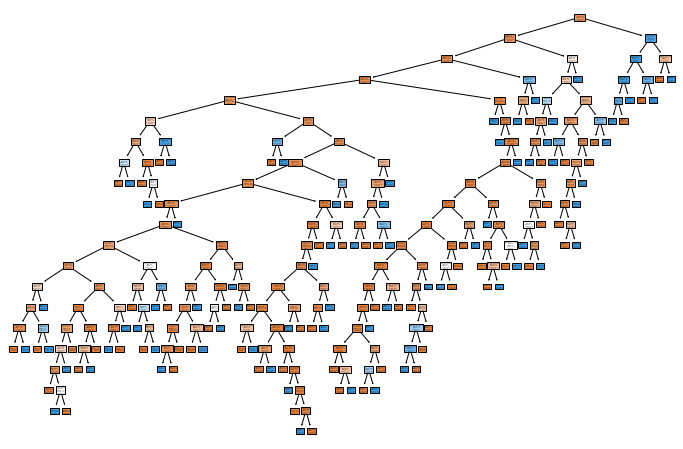

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Crear una figura y establecer su tamaño
fig, ax = plt.subplots(figsize=(12, 8))

# Visualizar el árbol de decisión
tree.plot_tree(dt_classifier, feature_names=list(X_train.columns), class_names=["0", "1"], filled=True, ax=ax)

# Mostrar el gráfico del árbol de decisión
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Definir los hiperparámetros a probar
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}

# Crear el clasificador Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=random_seed)

# Realizar grid search con validación cruzada
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los resultados
results = grid_search.cv_results_
best_estimator = grid_search.best_estimator_

# Imprimir los resultados
print("Resultados de Grid Search:")
for mean_score, std_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print("Accuracy promedio:", mean_score)
    print("Varianza:", std_score)
    print("Configuración:", params)
    print("----------------------------------------------")

# Evaluar sobre el conjunto de entrenamiento y evaluación con la mejor configuración encontrada
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

print("Métricas en el conjunto de entrenamiento:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-score:", f1_score(y_train, y_train_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_train, y_train_pred))
print("----------------------------------------------")

print("Métricas en el conjunto de evaluación:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-score:", f1_score(y_test, y_test_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))

Resultados de Grid Search:
Accuracy promedio: 0.8799617799617799
Varianza: 0.011325754211819122
Configuración: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
----------------------------------------------
Accuracy promedio: 0.8745745745745745
Varianza: 0.011392630362439302
Configuración: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}
----------------------------------------------
Accuracy promedio: 0.8718832468832469
Varianza: 0.011834359785345493
Configuración: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}
----------------------------------------------
Accuracy promedio: 0.884015834015834
Varianza: 0.015491067666759303
Configuración: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
----------------------------------------------
Accuracy promedio: 0.8806420056420056
Varianza: 0.01381458861170054
Configuración: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
----------------------------------------------
Accur

El criterio de Gini y la entropía son dos medidas utilizadas en el algoritmo de árbol de decisión para determinar la calidad de una partición. Ambos criterios se utilizan para calcular la impureza de un nodo en función de las clases de los ejemplos que contiene.

El criterio de Gini se basa en el índice de Gini, que es una medida de la probabilidad de clasificar incorrectamente un ejemplo seleccionado aleatoriamente en función de la distribución de las clases en el nodo. Un valor de Gini más bajo indica una mayor pureza en el nodo.

La entropía, por otro lado, es una medida de la impureza de un conjunto de ejemplos. Se calcula utilizando el concepto de información, que se refiere a la cantidad de incertidumbre en la clasificación de los ejemplos. Un valor de entropía más bajo indica una mayor pureza en el nodo.

En cuanto al parámetro min_samples_leaf, controla la cantidad mínima de ejemplos requeridos en una hoja del árbol. Si se establece un valor para min_samples_leaf, el árbol de decisión se detendrá cuando el número de ejemplos en una hoja sea menor que el valor especificado. Esto ayuda a evitar el sobreajuste y puede mejorar la capacidad de generalización del modelo.

Es importante experimentar con diferentes valores de hiperparámetros, como el criterio y min_samples_leaf, para encontrar la configuración óptima que se ajuste mejor a los datos y proporcione un rendimiento óptimo en términos de métricas de evaluación.

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los valores a probar para cada hiperparámetro
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Crear el clasificador Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Realizar grid search con validación cruzada
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los resultados
results = grid_search.cv_results_
best_estimator = grid_search.best_estimator_

for mean_score, std_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    dt_classifier = DecisionTreeClassifier(random_state=42, **params)
    dt_classifier.fit(X_train, y_train)
    y_test_pred = dt_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    
    print("Hiperparámetros:", params)
    print("Accuracy promedio:", mean_score)
    print("Varianza:", std_score)
    print("Recall:", recall)
    print("Precision:", precision)
    print("----------------------------------------------")

# Evaluar el mejor modelo en el conjunto de entrenamiento y evaluación
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

# Calcular las métricas para el mejor modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Imprimir las métricas para el mejor modelo
print("Métricas para el mejor modelo:")
print("Accuracy en entrenamiento:", train_accuracy)
print("Precision en entrenamiento:", train_precision)
print("Recall en entrenamiento:", train_recall)
print("F1-score en entrenamiento:", train_f1)
print("Matriz de confusión en entrenamiento:")
print(train_confusion_matrix)
print("----------------------------------------------")
print("Accuracy en evaluación:", test_accuracy)
print("Precision en evaluación:", test_precision)
print("Recall en evaluación:", test_recall)
print("F1-score en evaluación:", test_f1)
print("Matriz de confusión en evaluación:")
print(test_confusion_matrix)

# Graficar el árbol con la mayor precisión
dot_data = tree.export_graphviz(best_estimator, out_file=None,
                                feature_names=list(X_train.columns),
                                class_names=["0", "1"],
                                filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_best_accuracy")

# Graficar el árbol con el mayor recall
recall_scores = [result['mean_test_recall'] for result in results]
best_recall_index = recall_scores.index(max(recall_scores))
best_recall_params = results['params'][best_recall_index]
best_recall_estimator = DecisionTreeClassifier(**best_recall_params, random_state=42)
best_recall_estimator.fit(X_train, y_train)

dot_data_recall = tree.export_graphviz(best_recall_estimator, out_file=None,
                                       feature_names=list(X_train.columns),
                                       class_names=["0", "1"],
                                       filled=True)
graph_recall = graphviz.Source(dot_data_recall)
graph_recall.render("decision_tree_best_recall")

Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
Accuracy promedio: 0.8799617799617799
Varianza: 0.011325754211819122
Recall: 0.5757575757575758
Precision: 0.6909090909090909
----------------------------------------------
Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2}
Accuracy promedio: 0.8806374556374555
Varianza: 0.01583261939173122
Recall: 0.5454545454545454
Precision: 0.7058823529411765
----------------------------------------------
Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}
Accuracy promedio: 0.8745745745745745
Varianza: 0.011392630362439302
Recall: 0.5606060606060606
Precision: 0.6981132075471698
----------------------------------------------
Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}
Accuracy promedio: 0.8718832468832469
Varianza: 0.011834359785345493
Recall: 0.5909090909090909
Precision: 0.8125
-------------------------------------------

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los valores a probar para cada hiperparámetro
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Crear el clasificador Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Realizar grid search con validación cruzada
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los resultados
results = grid_search.cv_results_
best_estimators = []

for mean_score, std_score, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    dt_classifier = DecisionTreeClassifier(random_state=42, **params)
    dt_classifier.fit(X_train, y_train)
    y_test_pred = dt_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    
    # Agregar el clasificador y el recall a la lista de mejores estimadores
    best_estimators.append((dt_classifier, recall))

# Ordenar los mejores estimadores por recall de forma descendente
best_estimators.sort(key=lambda x: x[1], reverse=True)

# Filtrar los 10 mejores estimadores con mayor recall
top_10_estimators = best_estimators[:10]

# Imprimir los resultados de los 10 mejores estimadores
for estimator, recall in top_10_estimators:
    y_train_pred = estimator.predict(X_train)
    y_test_pred = estimator.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    
    print("Recall en :", recall)
    print("Hiperparámetros:", estimator.get_params())
    print("Accuracy en entrenamiento:", train_accuracy)
    print("Precision en entrenamiento:", train_precision)
    print("F1-score en entrenamiento:", train_f1)
    print("Matriz de confusión en entrenamiento:")
    print(train_confusion_matrix)
    print("----------------------------------------------")
    print("Accuracy en evaluación:", test_accuracy)
    print("Precision en evaluación:", test_precision)
    print("F1-score en evaluación:", test_f1)
    print("Matriz de confusión en evaluación:")
    print(test_confusion_matrix)
    print("----------------------------------------------")